In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2.Import the CSV Data as Pandas Dataframe

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
# show top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3.Datachecks to perform
* Check missing values
* Check duplicates
* Check datatypes
* Check the number of unique values in each column
* Check the statistics of the data
* Check various categories present in the different categorical column


### 3.1 Check missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

### 3.3 Check the datatypes

In [8]:
# check null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check the statistics of the data

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insight
* from above all the numerical features are close to each other ( 66 - 68.05)
* all standard deviation is close - between 14.6 and 15.19
* maths has a minimum score of 0 , while it is 10 for writing, whereas the reading has highest minimum score of 17.

### 3.5 Exploring the data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in the 'gender' variable : ", end=" ")
print(df['gender'].unique())

print("Categories in the 'race/ethnicity' variable : ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in the 'parental level of education' variable : ", end=" ")
print(df['parental level of education'].unique())

print("Categories in the 'lunch' variable : ", end=" ")
print(df['lunch'].unique())

print("Categories in the 'test preparation course' variable : ", end=" ")
print(df['test preparation course'].unique())


Categories in the 'gender' variable :  ['female' 'male']
Categories in the 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the 'lunch' variable :  ['standard' 'free/reduced']
Categories in the 'test preparation course' variable :  ['none' 'completed']


In [13]:
# define numerical and categorical features
numerical_features = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

print(f" We have {len(numerical_features)} numerical features: {numerical_features}")
print(f" We have {len(categorical_features)} categorical features: {categorical_features}")


 We have 3 numerical features: ['math score', 'reading score', 'writing score']
 We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for 'Total Score' and 'Average'

In [15]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Number of students with full marks in Maths: { math_full}')
print(f'Number of students with full marks in Reading: { reading_full}')
print(f'Number of students with full marks in Writing: { writing_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [17]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: { math_less_20}')
print(f'Number of students with less than 20 marks in Reading: { reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: { writing_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


Insights:
* from above values we get students perform worst in Maths
* and best in Reading

## 4. Exploring the Data( Visualization )

### 4.1 Visualize avg score distribution to make some conclusion
* Histogram
* KDE

#### 4.1.1 Histogram and KDE

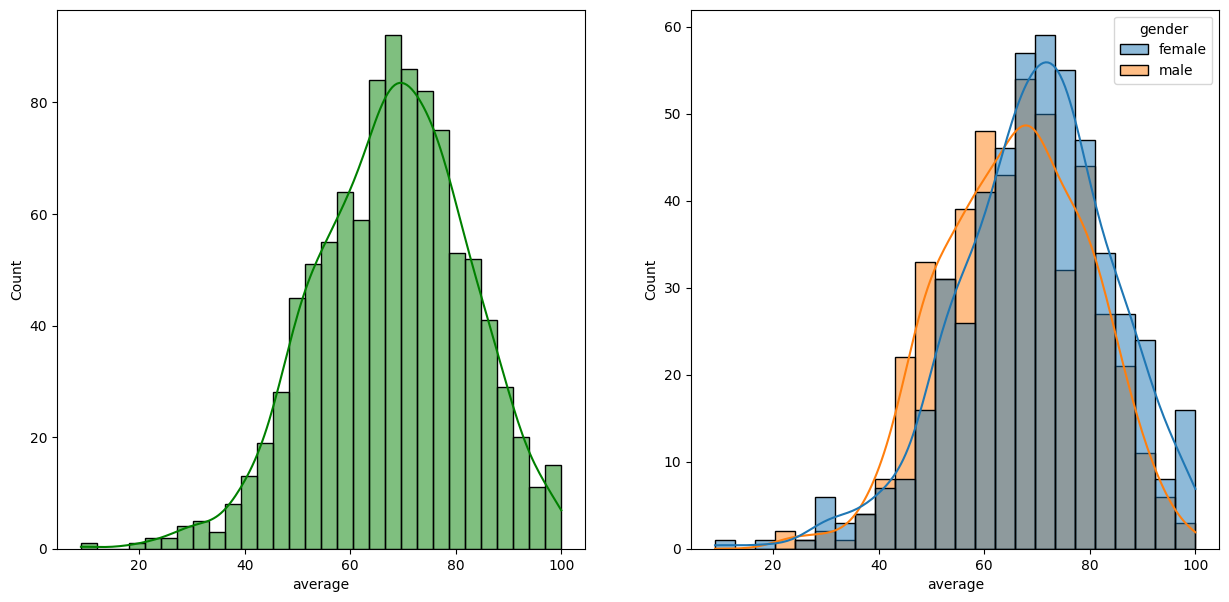

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde= True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='average', kde='True', hue='gender')
plt.show()

Females perform better than males

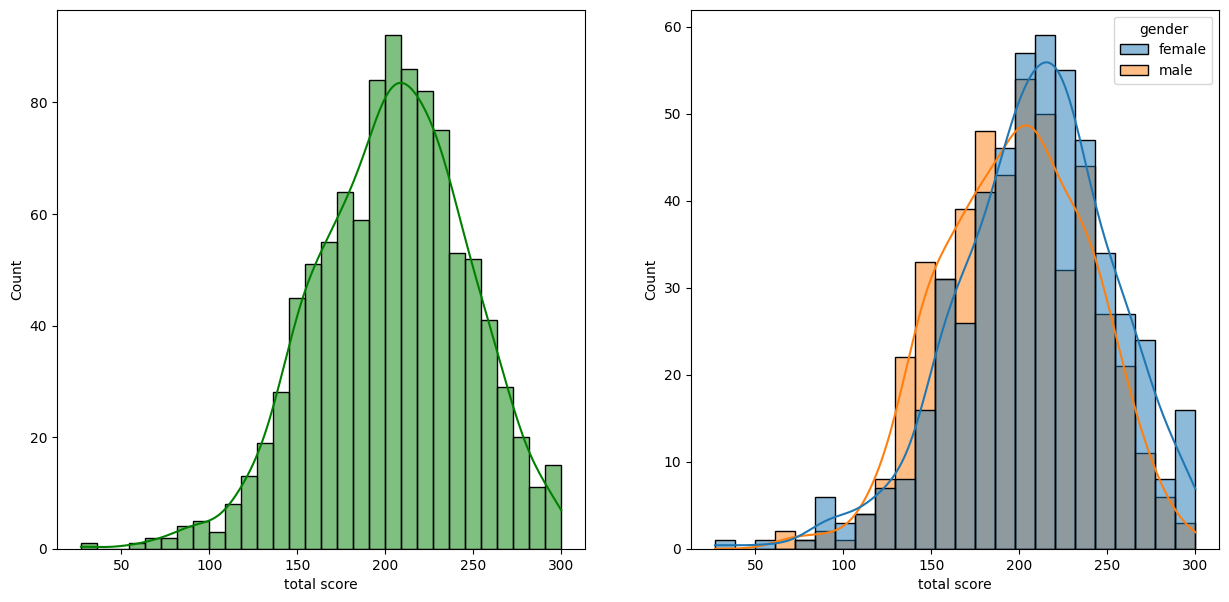

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde= True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='total score', kde='True', hue='gender')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

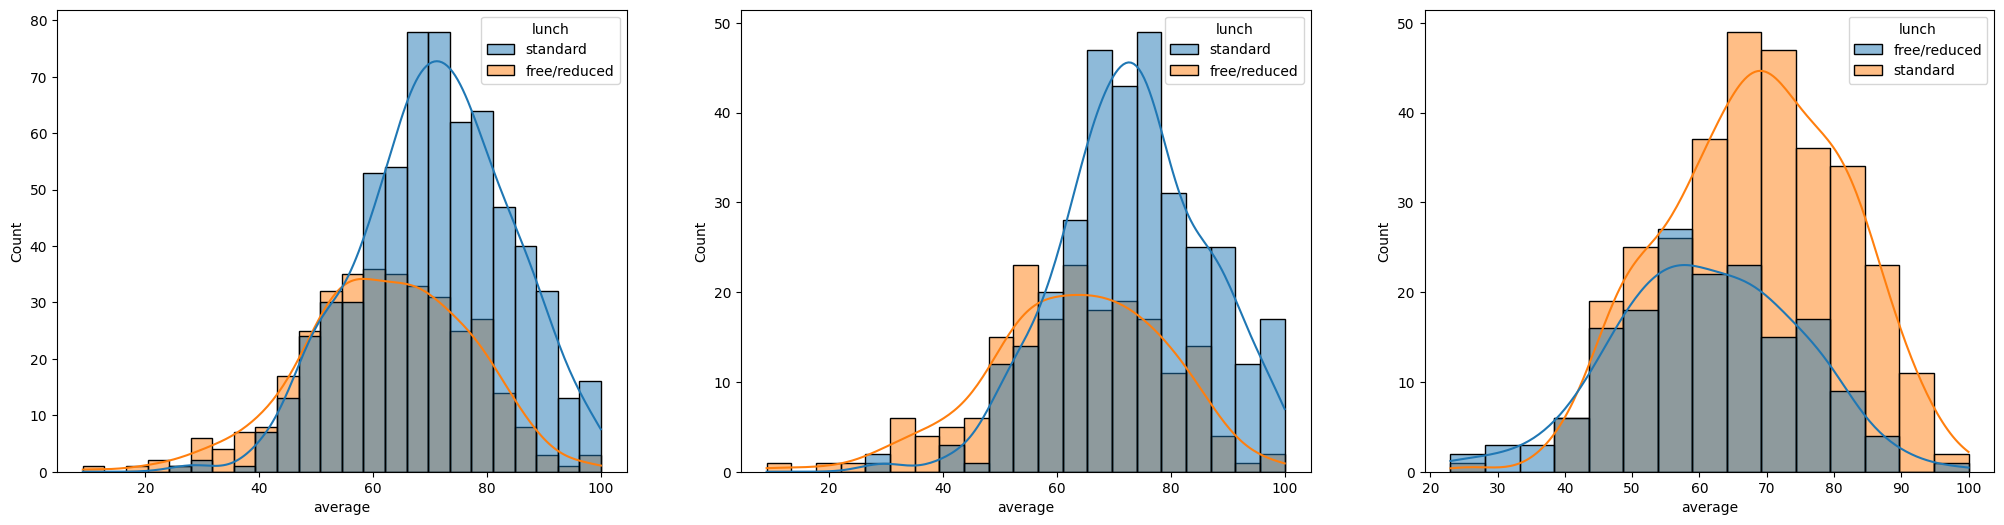

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show

insights:
* standard lunch helps perform well in exams for both males and females

<function matplotlib.pyplot.show(close=None, block=None)>

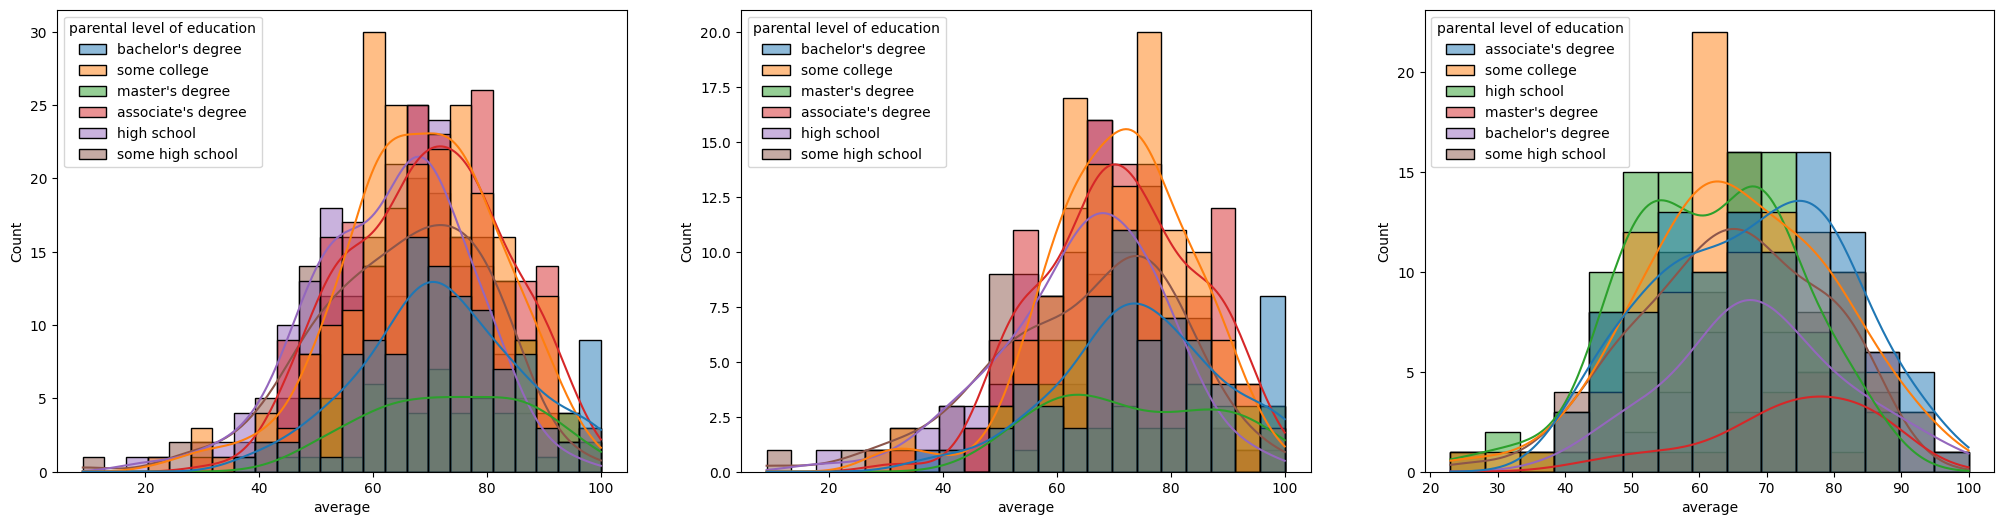

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

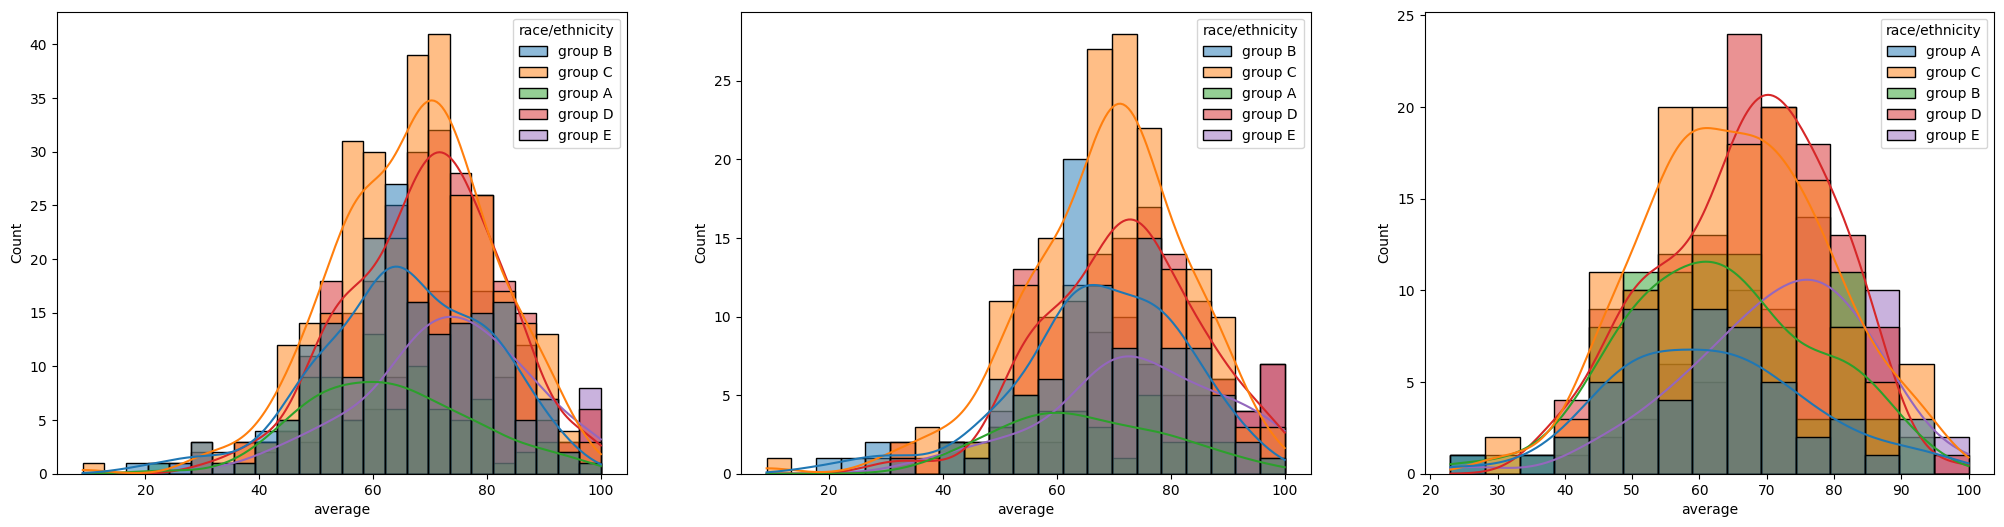

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')
plt.show

* Performance of the Group A and Group B is poor irrespective of male or female.

### 4.2 Maximum score of students in the subjects

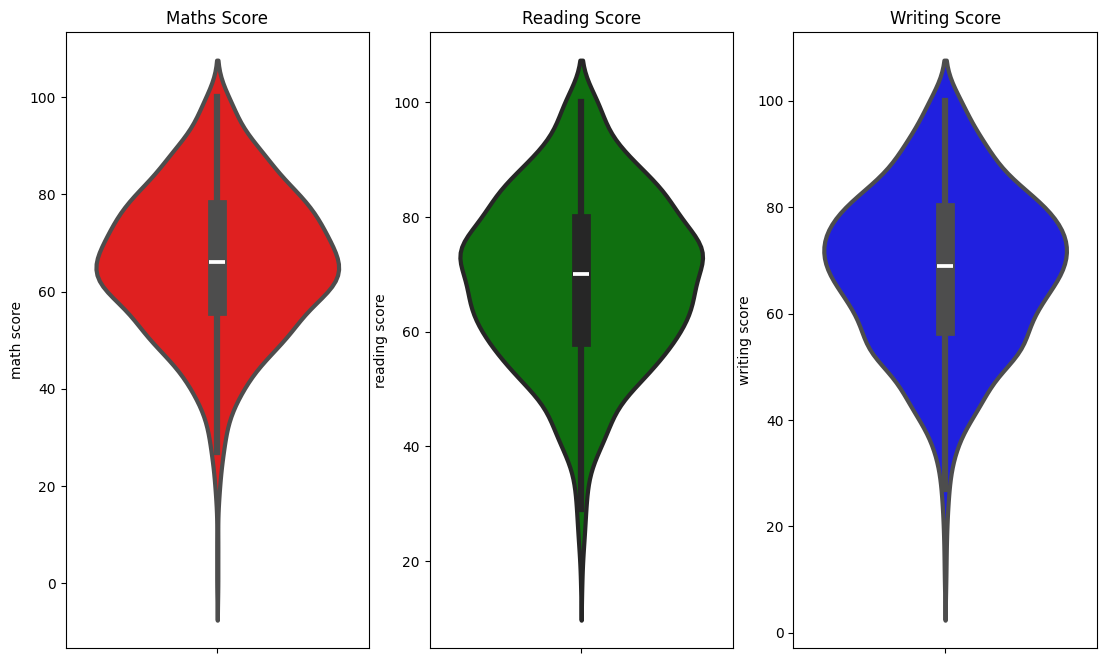

In [23]:
plt.figure(figsize=(18, 8))
plt.subplot(1,4,1)
plt.title("Maths Score")
sns.violinplot(y='math score', data=df, color='red', linewidth=3 )
plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(y='reading score', data=df, color='green', linewidth=3 )
plt.subplot(1,4,3)
plt.title("Writing Score")
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3 )
plt.show()

From the three plots it is clear that most of the students score between 60-80 for reading and writing , whereas they score between 50-80 for maths

### 4.3 Multivariate Analysis

In [24]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

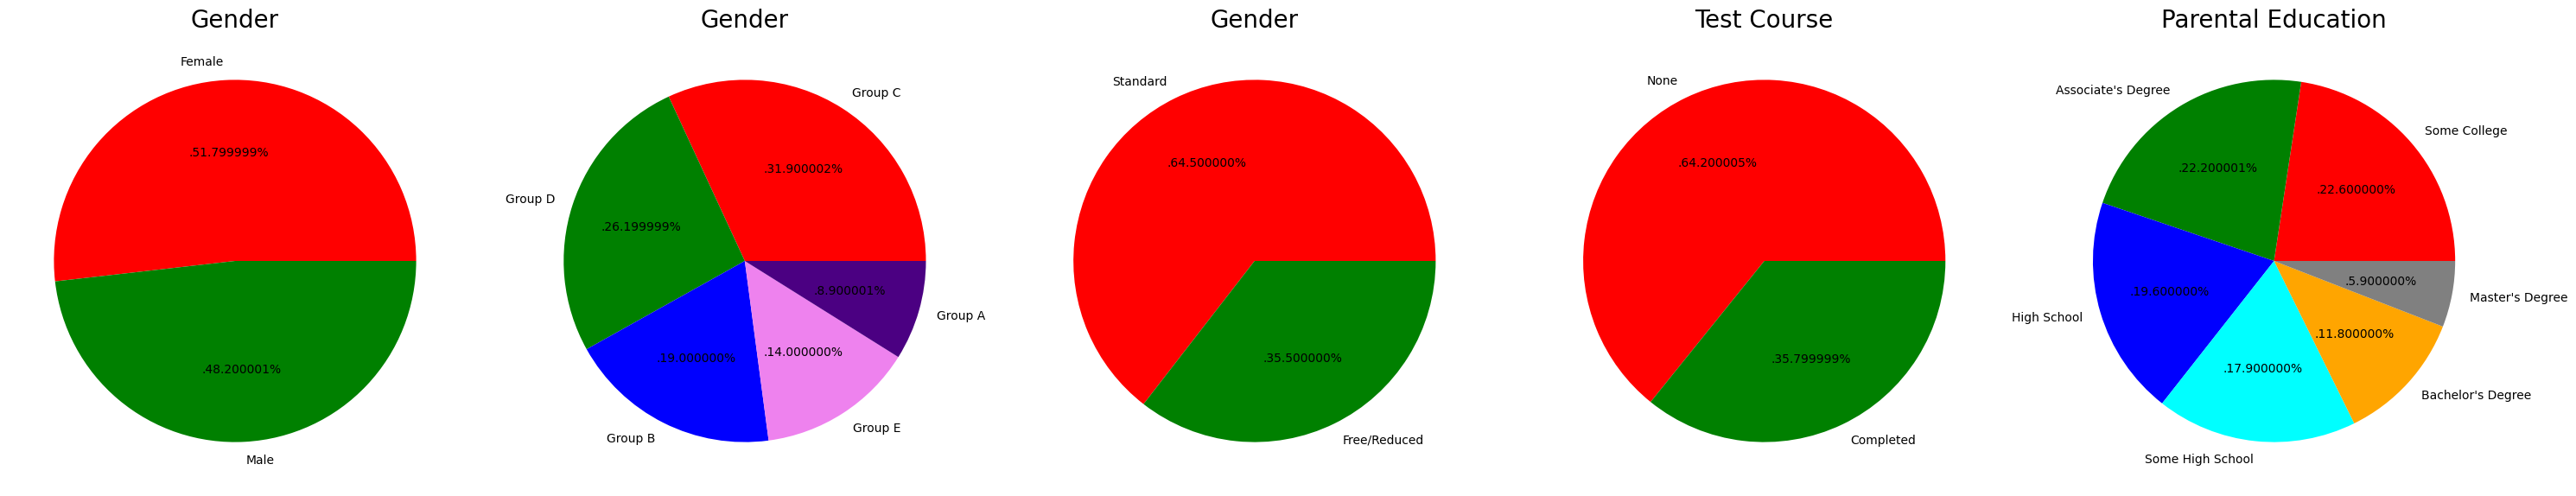

In [25]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors =color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'violet', 'indigo']

plt.pie(size, colors =color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['red', 'green']

plt.pie(size, colors =color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights:
* No. of males and females are almost equal.
* Number of students from Group C is highest (~31.9%) while student in Group A is least(8.9%)
* Student having standard lunch is greater( 64%)
* Number of students who have not enrolled in any Test preparation course is greater.
* Number of students whose parents have 'Some college' degree is greater followed by 'Associate's Degree'.

### 4.4 Feature wise visualization

#### 4.4.1 Gender column
* how is distribution of gender
* is gender has any impact on student's performance

### Univariate : How is distribution of gender?

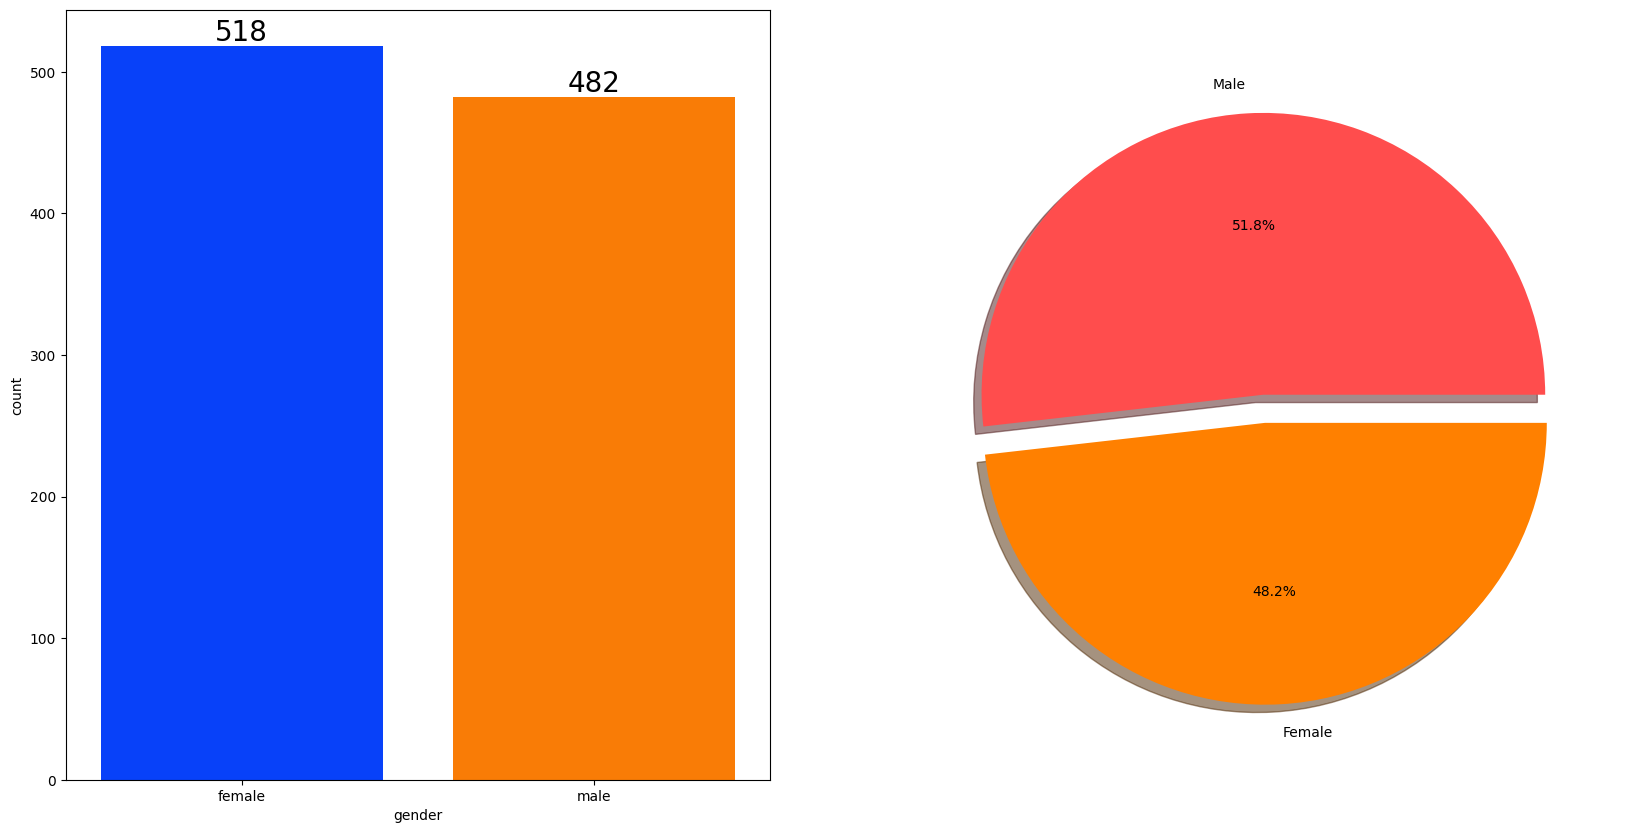

In [34]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)
  
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


insights:
* The gender data is balanced with 518(52%) female students and 482(48%) male students

### Bivariate Analysis( Does gender has any impact on the student's performance)

In [63]:
gender_group = df.groupby('gender')
gender_group

TypeError: agg function failed [how->mean,dtype->object]

In [62]:
gender_group['average'].mean()[0]

np.float64(69.56949806949807)

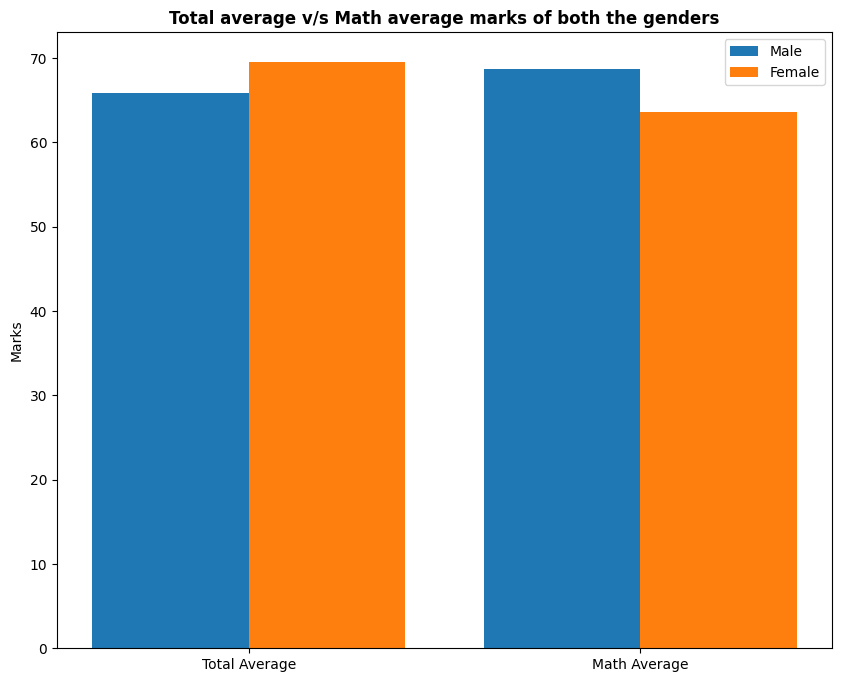

In [64]:
plt.figure(figsize=(10,8))

X= ['Total Average', 'Math Average']

female_scores =  [gender_group['average'].mean()[0], gender_group['math score'].mean()[0]]
male_scores = [gender_group['average'].mean()[1], gender_group['math score'].mean()[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis+0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights: 
* On an average females have a better overall score than men.
* whereas, the male scored higher on maths

### 4.4.2 Race/Ethnicity column
* how is race/ethnicity distributed?
* is race/ethnicity has any impact on the students performance?

### Univariate analysis ( How is Group wise distribution)?


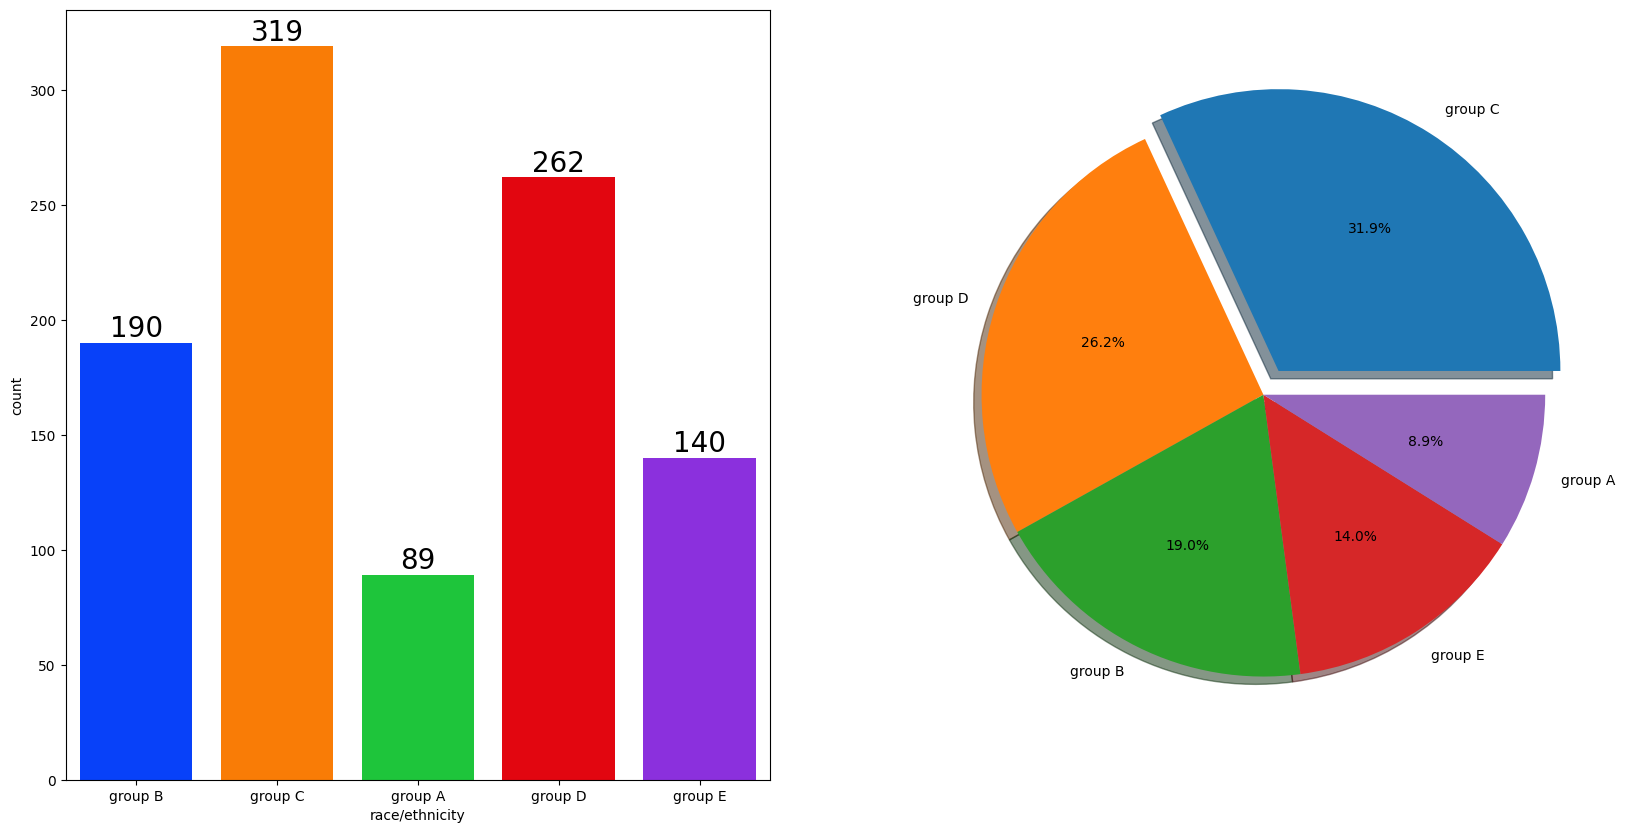

In [68]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df, x=df['race/ethnicity'], palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=20)
  
plt.pie(x=df['race/ethnicity'].value_counts(), explode=(0.1,0,0,0,0), labels=df['race/ethnicity'].value_counts().index, autopct='%1.1f%%',shadow=True )

plt.show()

Insights:
* Most of the students belonging from group C/ group D
* Lowest number of students belong to group A

### Bivariate analysis( is Race/Ethnicity has any impact on student performance?)

In [72]:
Group_data2 = df.groupby('race/ethnicity')
Group_data2['math score'].mean().values

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

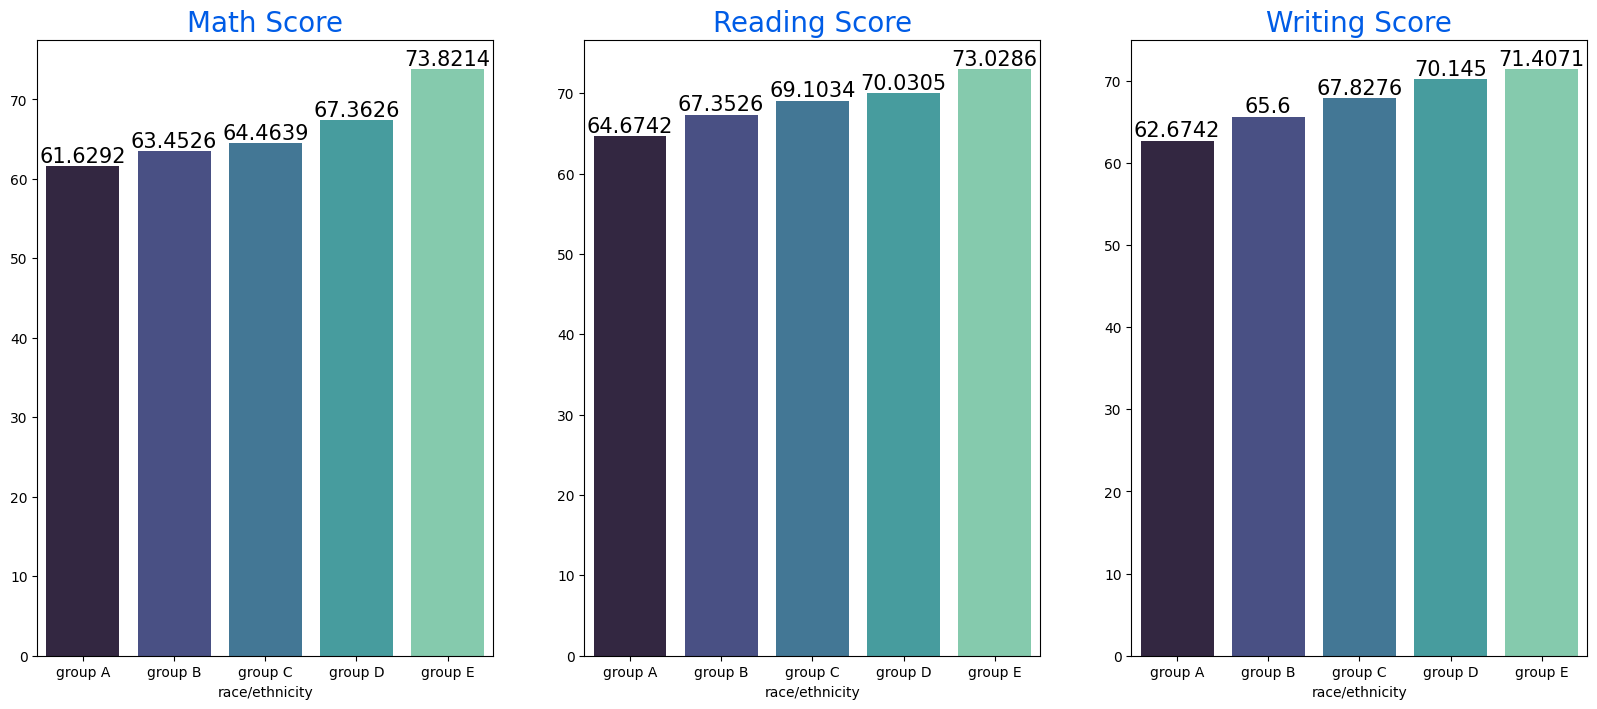

In [78]:
Group_data2 = df.groupby('race/ethnicity')
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
  ax[0].bar_label(container, color='black', size=15)
  
  
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
  ax[1].bar_label(container, color='black', size=15)
  
  
sns.barplot(x=Group_data2['writing score'].mean().index, y= Group_data2['writing score'].mean().values, palette='mako', ax=ax[2] )
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
  ax[2].bar_label(container, color='black', size=15)
  
plt.show()
  

Insights:
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects.

### Parental Level of Education
* What is the distribution of parental level of education
* Does parental level of education have an impact on students performance

#### Univariate analysis (distribution of parental level of education?)

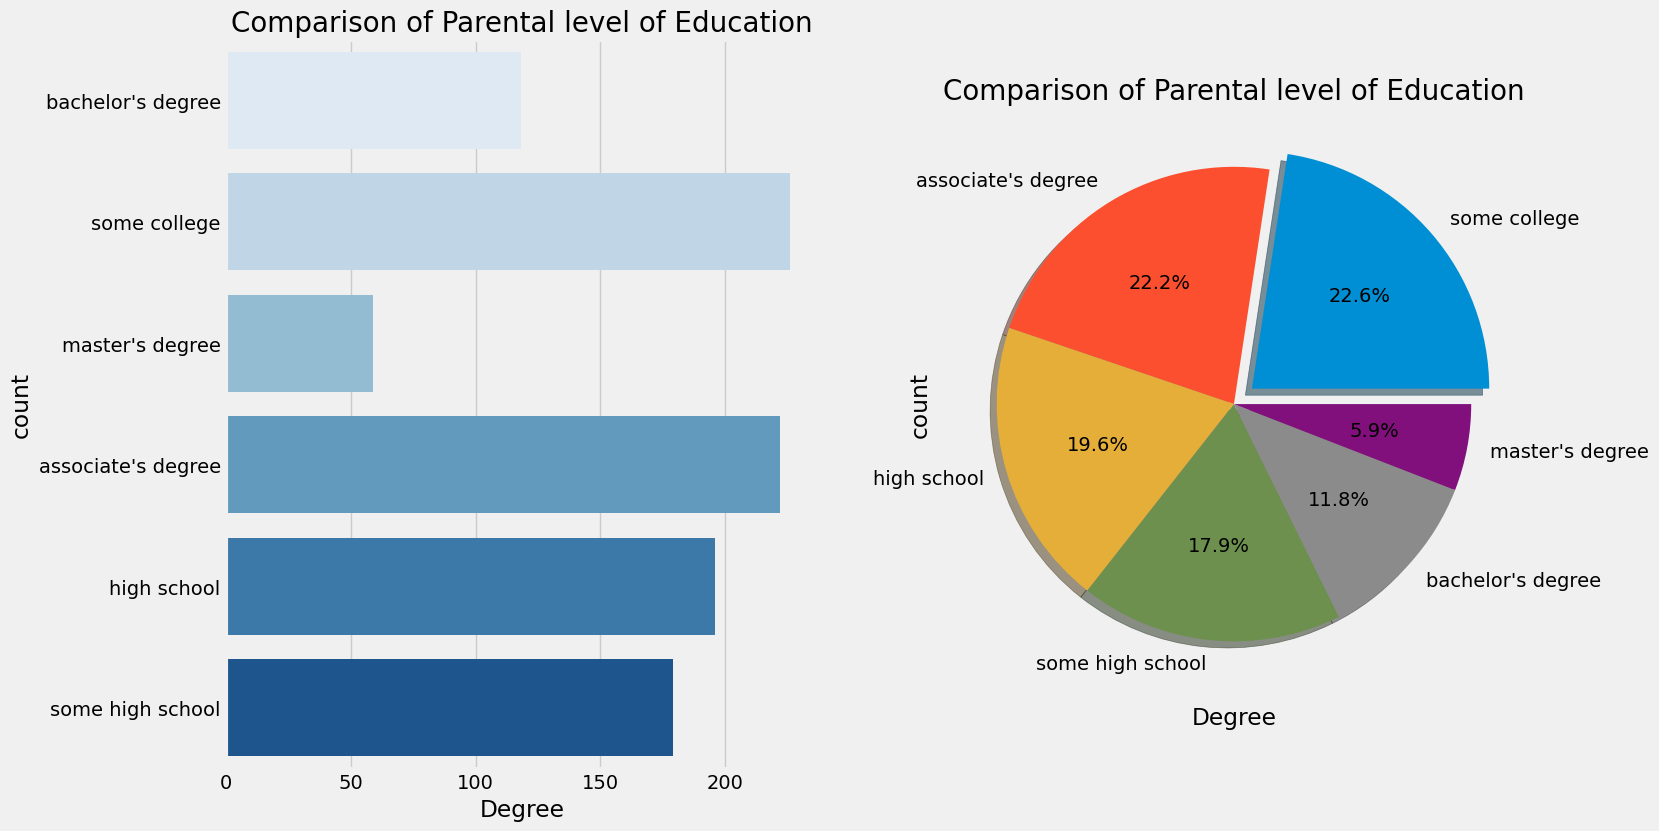

In [91]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
plt.subplot(121)
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental level of Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')

plt.subplot(122)
plt.pie(df['parental level of education'].value_counts(), labels= df['parental level of education'].value_counts().index, explode=[0.1, 0, 0, 0,0,0],autopct='%1.1f%%', shadow=True)
plt.title('Comparison of Parental level of Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights:
* largest number of parents are from some college degree

#### Bivariate analysis( Does parental education have any impact on student performance?)

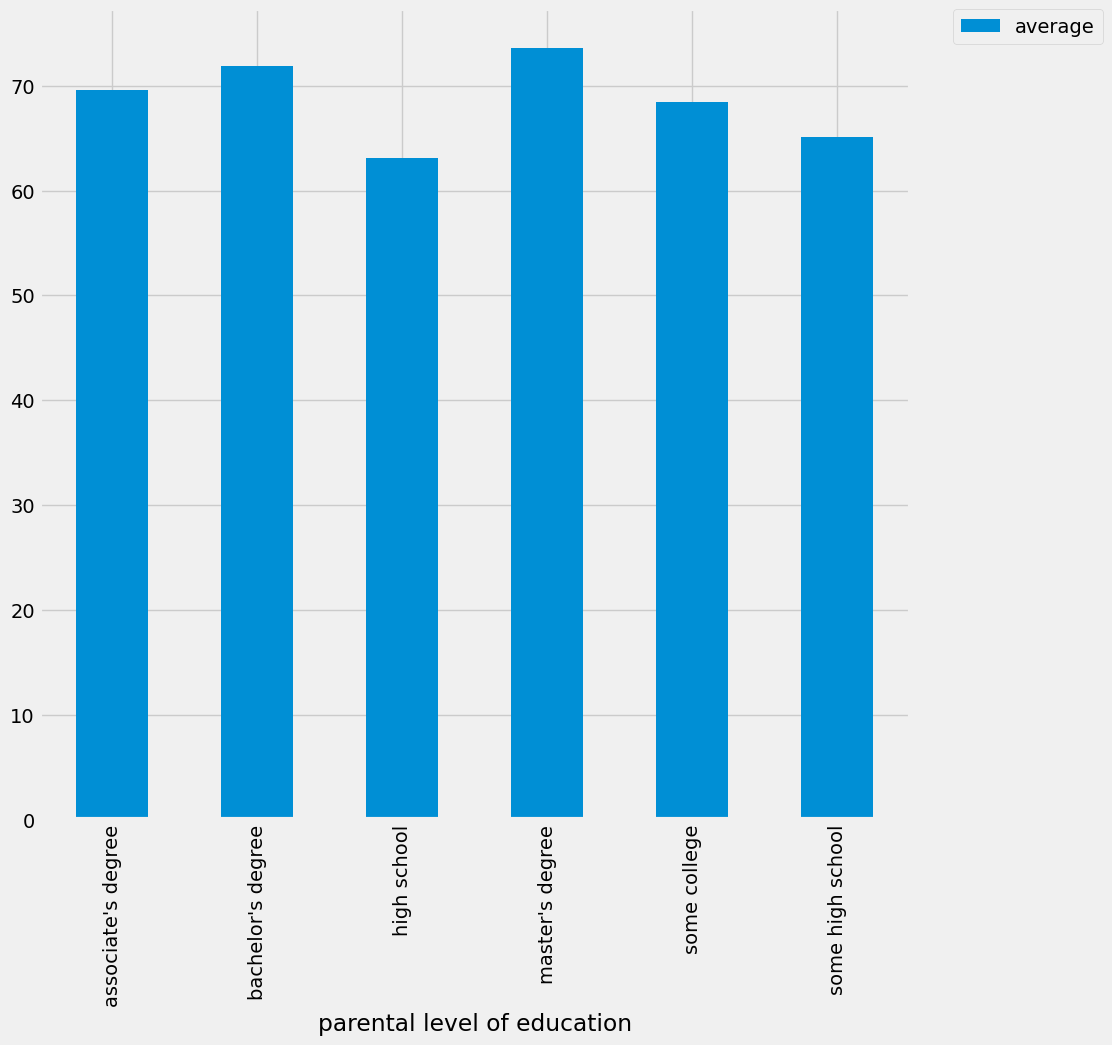

In [88]:
df.groupby('parental level of education')['average'].agg('mean').plot(kind='bar', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

Insights:
* The score of student of parents having bachelors or masters degree are higher

#### 4.4.4 LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

#### Univariate analysis

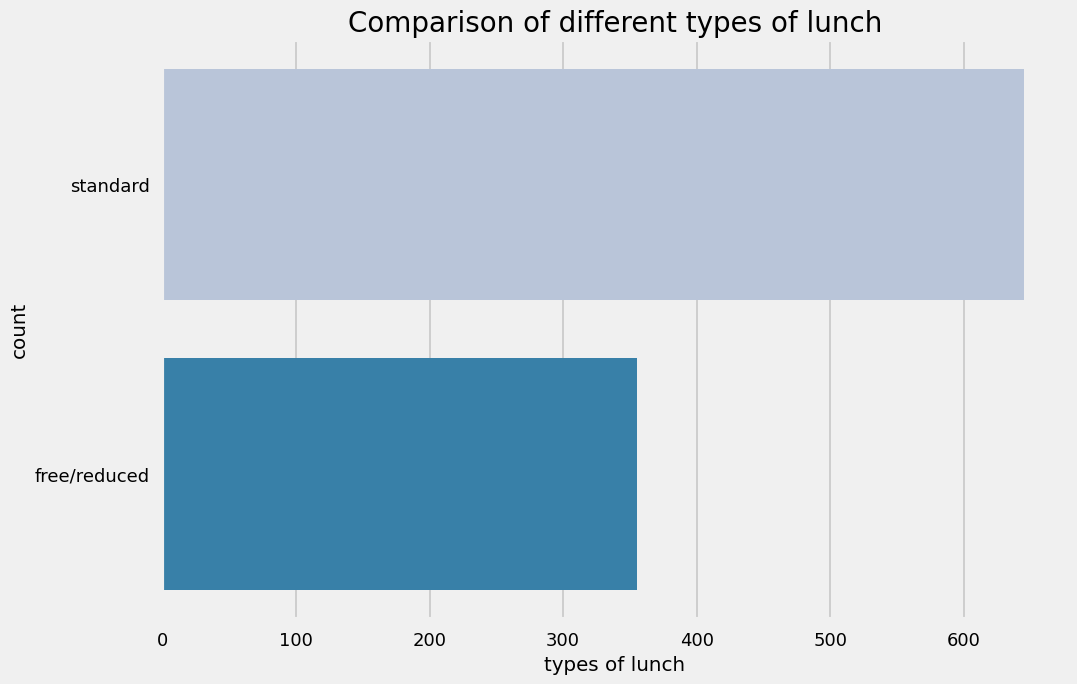

In [93]:
plt.rcParams['figure.figsize']=(15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights:
* Number of students having standard lunch is higher

#### Bivariate Analysis

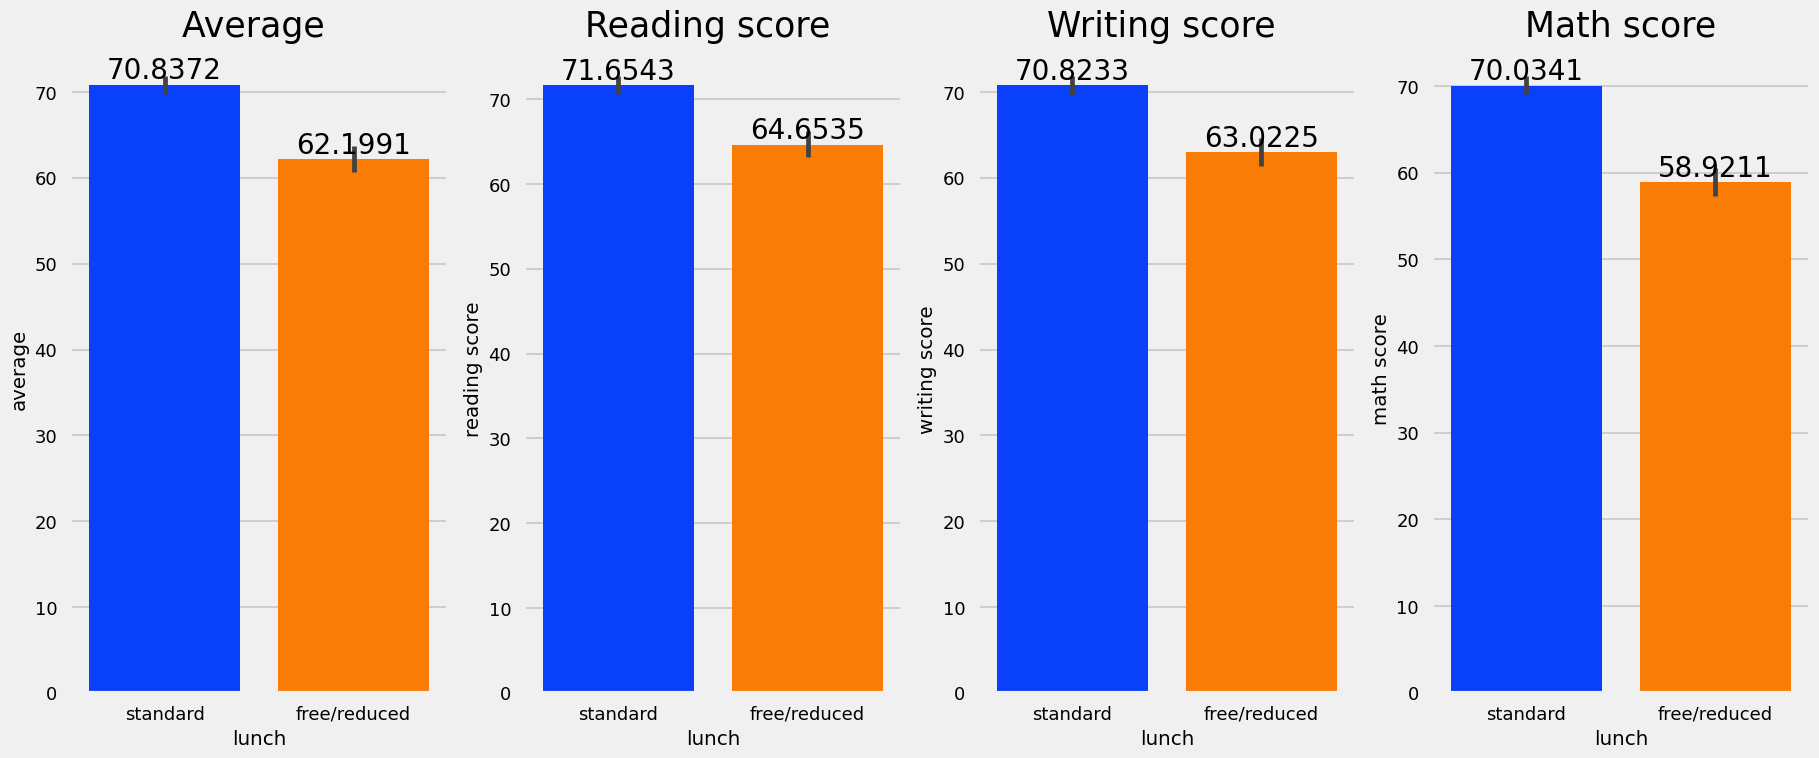

In [105]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.barplot(x=df['lunch'],data=df,y ='average',  palette = 'bright',saturation=0.95,ax=ax[0], )
ax[0].set_title('Average ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.barplot(x='lunch',data=df,y ='reading score',  palette = 'bright',saturation=0.95,ax=ax[1], )
ax[1].set_title('Reading score ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
    
sns.barplot(x='lunch',data=df,y ='writing score',  palette = 'bright',saturation=0.95,ax=ax[2], )
ax[2].set_title('Writing score ',color='black',size=25)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=20)
    
sns.barplot(x='lunch',data=df,y ='math score',  palette = 'bright',saturation=0.95,ax=ax[3], )
ax[3].set_title('Math score',color='black',size=25)
for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=20)
    

Insights:
* Student having standard lunch scores more in all course subjects

###

#### Test Preparation Course

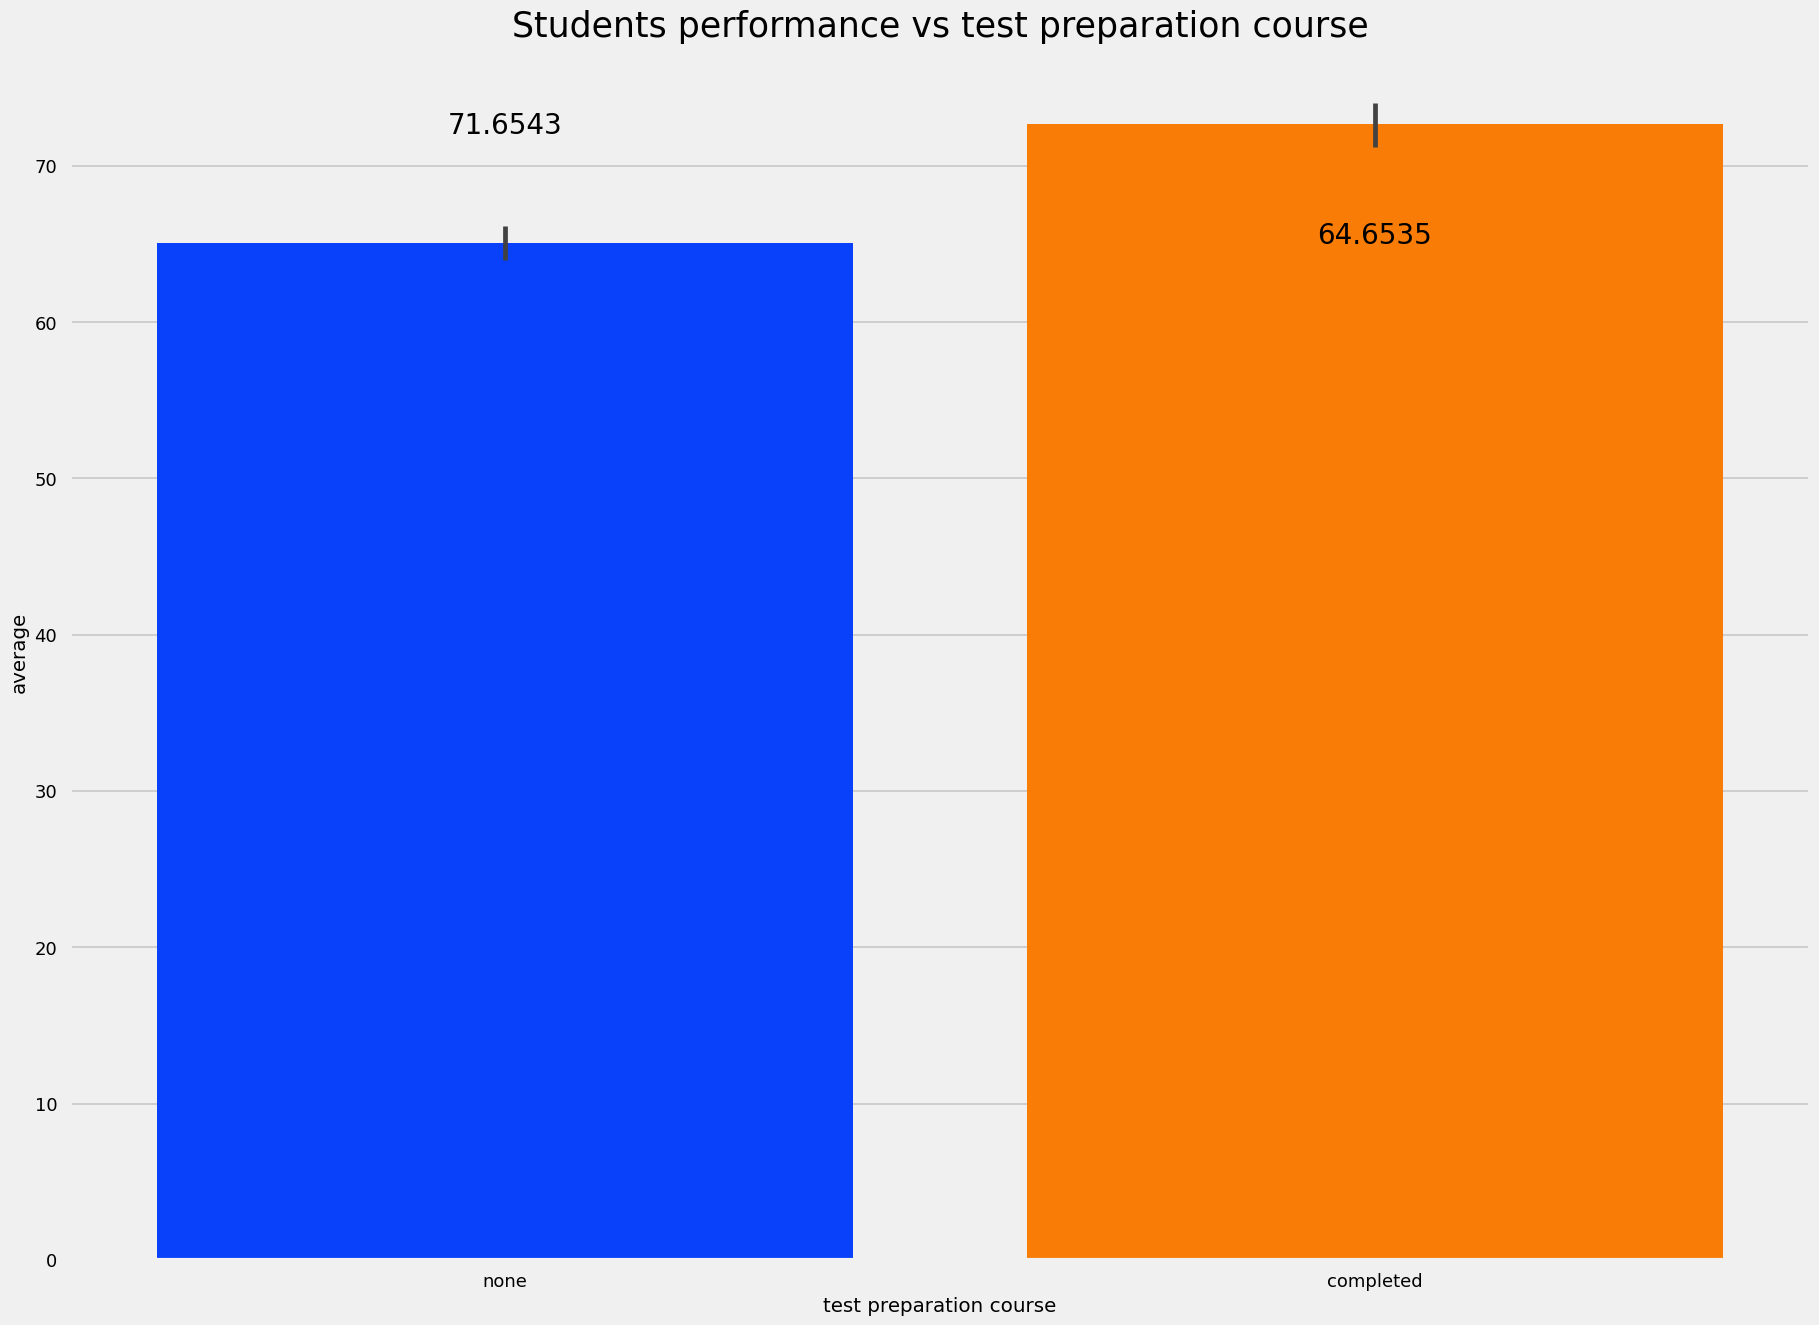

In [110]:
plt.figure(figsize=(20,15))
sns.barplot(x='test preparation course',data=df,y ='average',  palette = 'bright',saturation=0.95 )
plt.title('Students performance vs test preparation course',color='black',size=25)
for container in ax[1].containers:
    plt.bar_label(container,color='black',size=20)
    
plt.show()

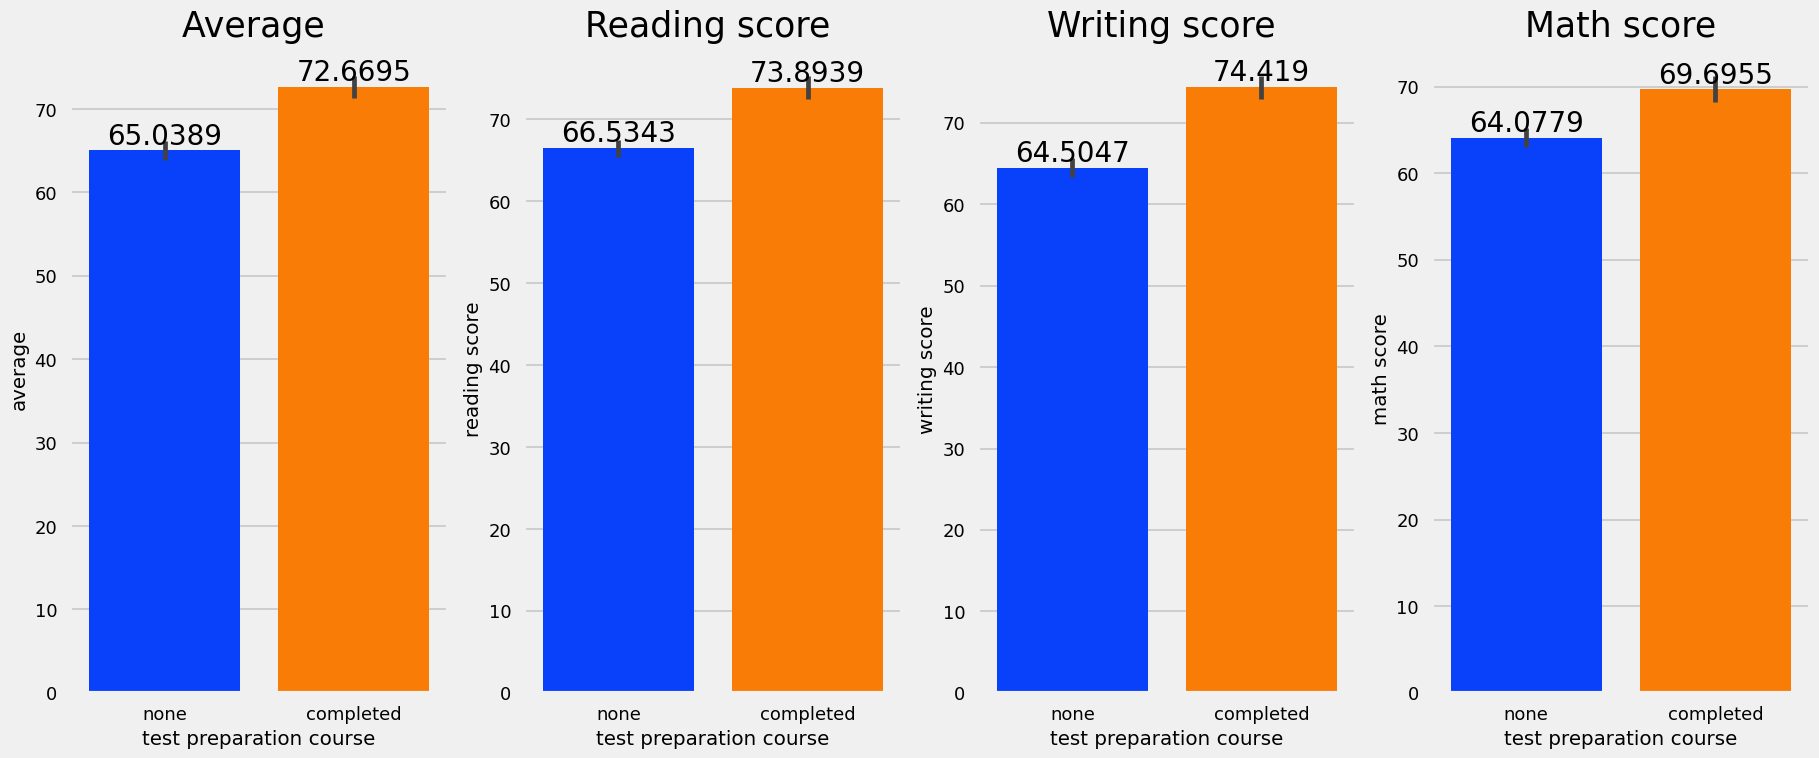

In [112]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.barplot(x=df['test preparation course'],data=df,y ='average',  palette = 'bright',saturation=0.95,ax=ax[0], )
ax[0].set_title('Average ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.barplot(x='test preparation course',data=df,y ='reading score',  palette = 'bright',saturation=0.95,ax=ax[1], )
ax[1].set_title('Reading score ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
    
sns.barplot(x='test preparation course',data=df,y ='writing score',  palette = 'bright',saturation=0.95,ax=ax[2], )
ax[2].set_title('Writing score ',color='black',size=25)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=20)
    
sns.barplot(x='test preparation course',data=df,y ='math score',  palette = 'bright',saturation=0.95,ax=ax[3], )
ax[3].set_title('Math score',color='black',size=25)
for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=20)

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

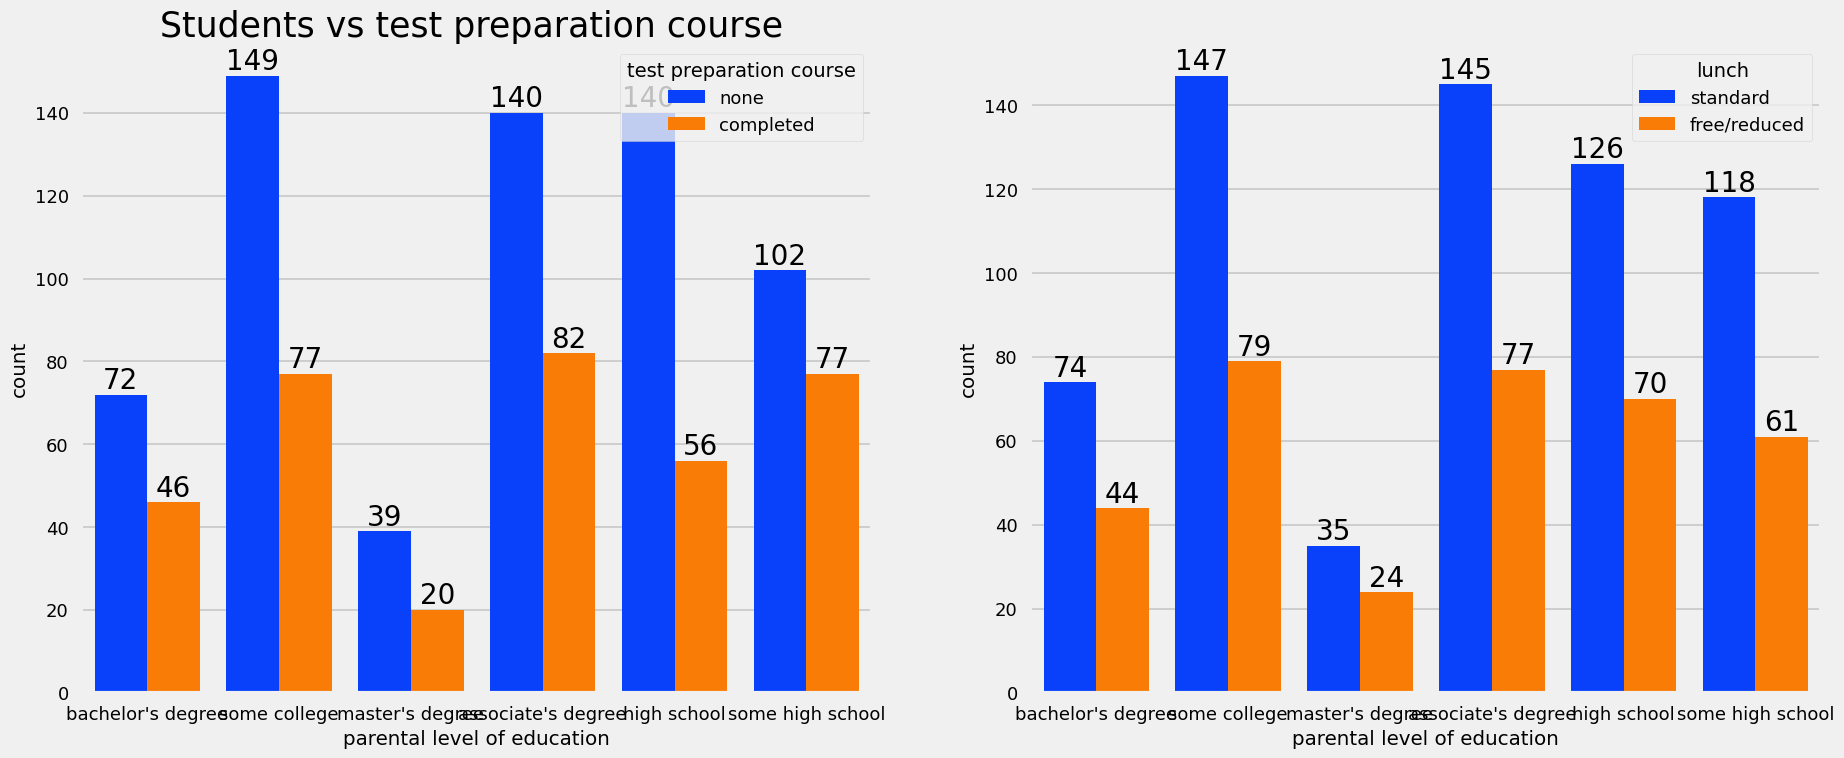

In [115]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing score'>

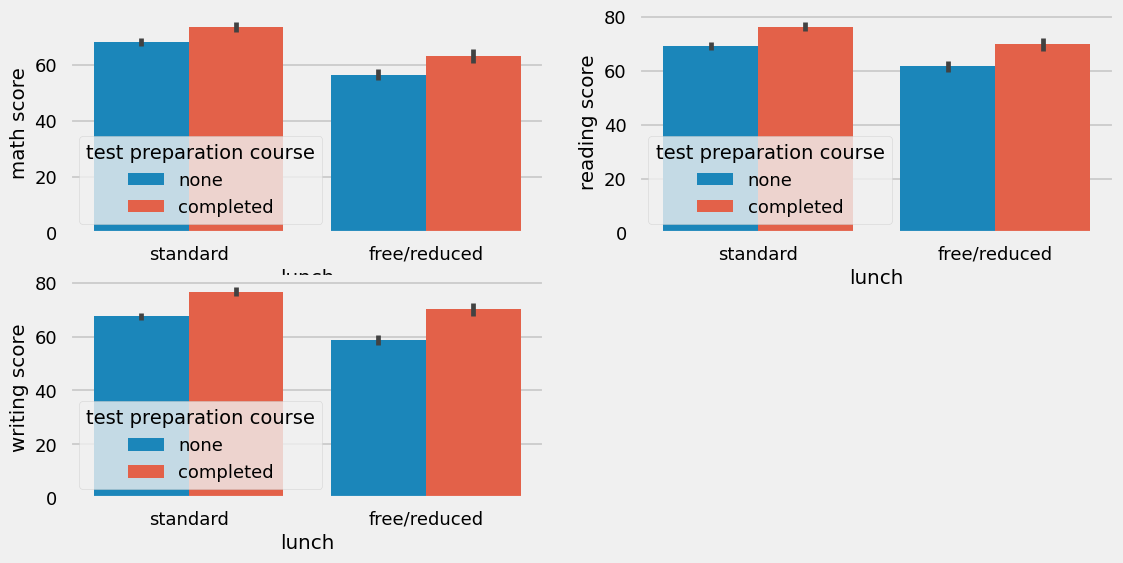

In [116]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### 4.4.6 Checking Outliers

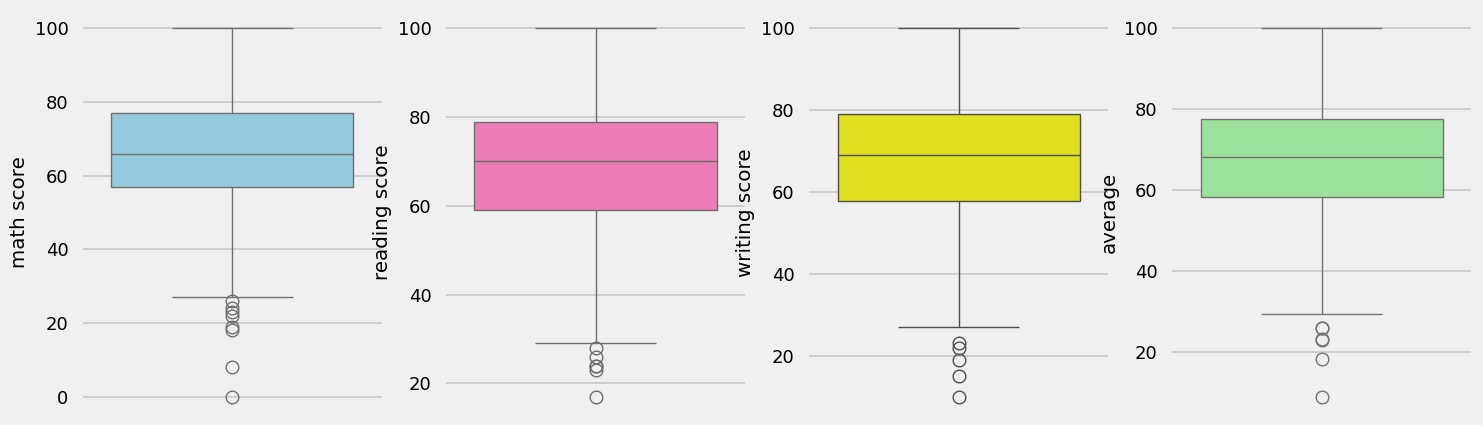

In [113]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 Multivariate analysis using pairplot

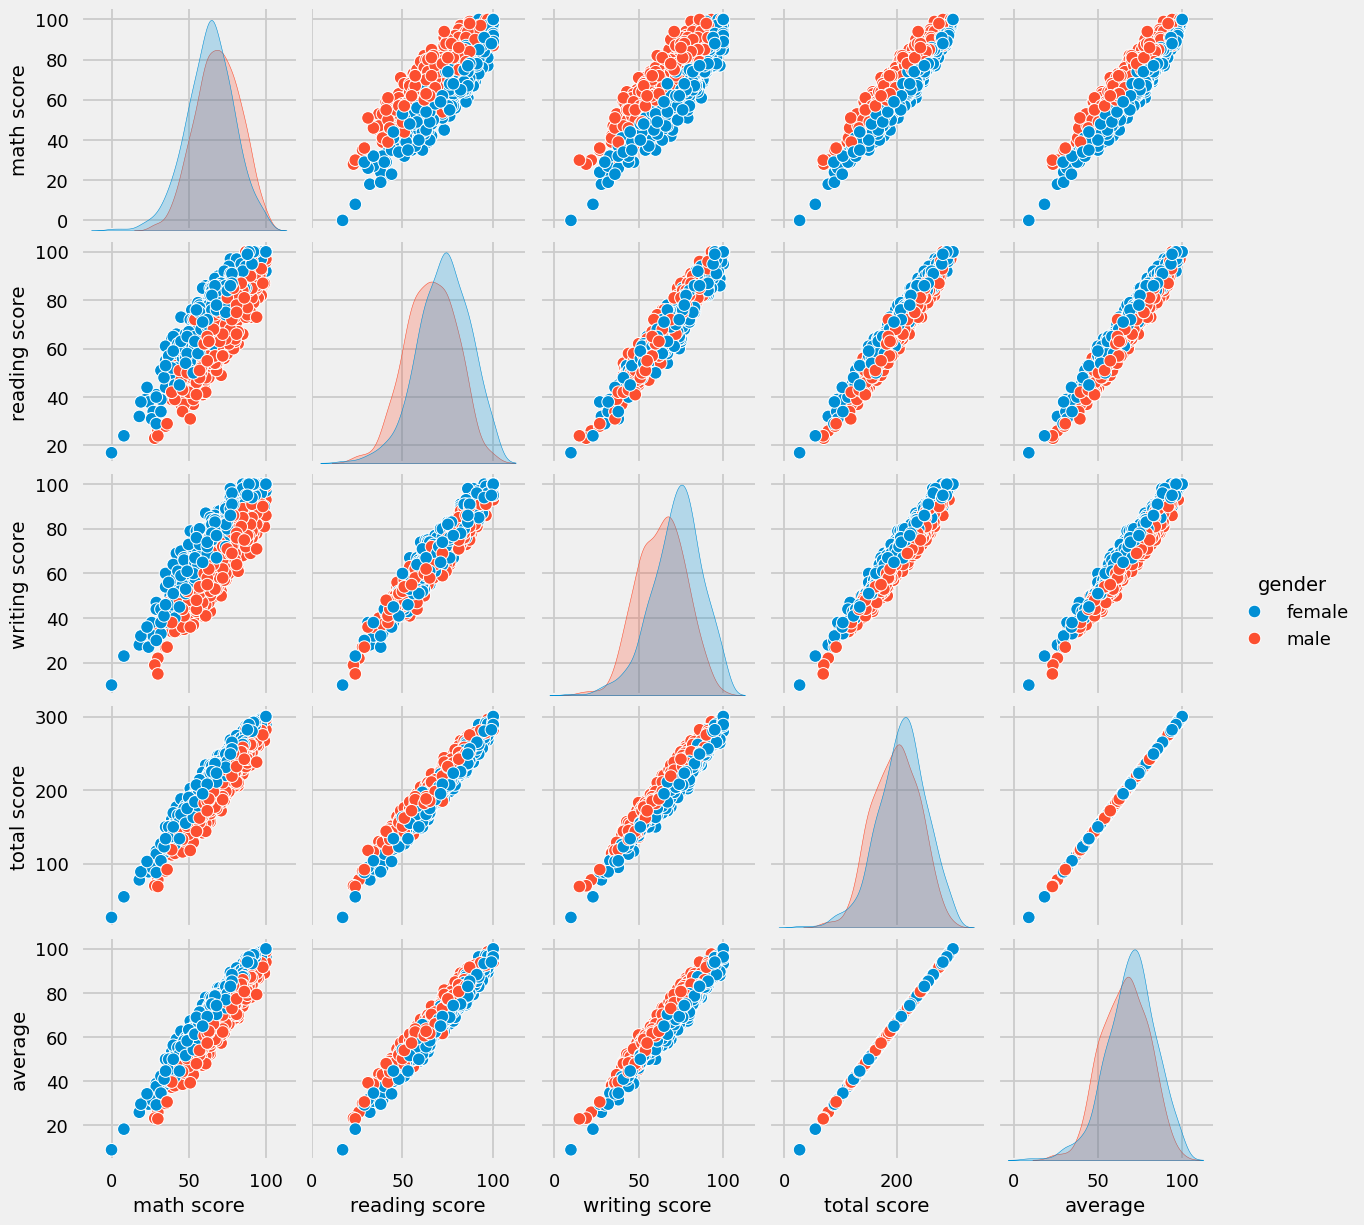

In [114]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insight:
* From the above plot it is clear that all the scores increases linearly with each other

## 5. Conclusions

* Student performance is related with lunch , race, parental education
* Females lead in pass percentage and also are top-scorers
* Students performance is not much related to test preparation course 
* Finishing preparation course is beneficial